# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [17]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first 5 records
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Descriptive Statistics

This section produce the descriptive statistics for each feature from the dataset.

In [18]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45222,NaN,NaN,NaN,38.5479,13.2179,17,28,37,47,90
workclass,45222,7,Private,33307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,45222,16,HS-grad,14783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,45222,NaN,NaN,NaN,10.1185,2.55288,1,9,10,13,16
marital-status,45222,7,Married-civ-spouse,21055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,45222,14,Craft-repair,6020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,45222,6,Husband,18666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,45222,5,White,38903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,45222,2,Male,30527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,45222,NaN,NaN,NaN,1101.43,7506.43,0,0,0,0,99999


### Finding the unique values per feature

Following the descriptive statistics, Lets find out the unique values that each feature has.

In [19]:
print ("workclass: ", data['workclass'].unique(), "\n")
print ("education_level: ", data['education_level'].unique(), "\n")
print ("marital-status: ", data['marital-status'].unique(), "\n")
print ("occupation: ", data['occupation'].unique(), "\n")
print ("relationship: ", data['relationship'].unique(), "\n")
print ("race: ", data['race'].unique(), "\n")
print ("sex: ", data['sex'].unique(), "\n")
print ("native-country: ", data['native-country'].unique(), "\n")

workclass:  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay'] 

education_level:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th'] 

marital-status:  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation:  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv'] 

relationship:  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race:  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex:  [' Male' ' Female'] 

native-country:  [' United-States' ' Cuba' ' Jamaica' 

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [20]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = sum(data.income == '>50K')

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = sum(data.income == '<=50K')

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = sum(data.income == '>50K')/len(data) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Plotting realations between dataset's Features and Income

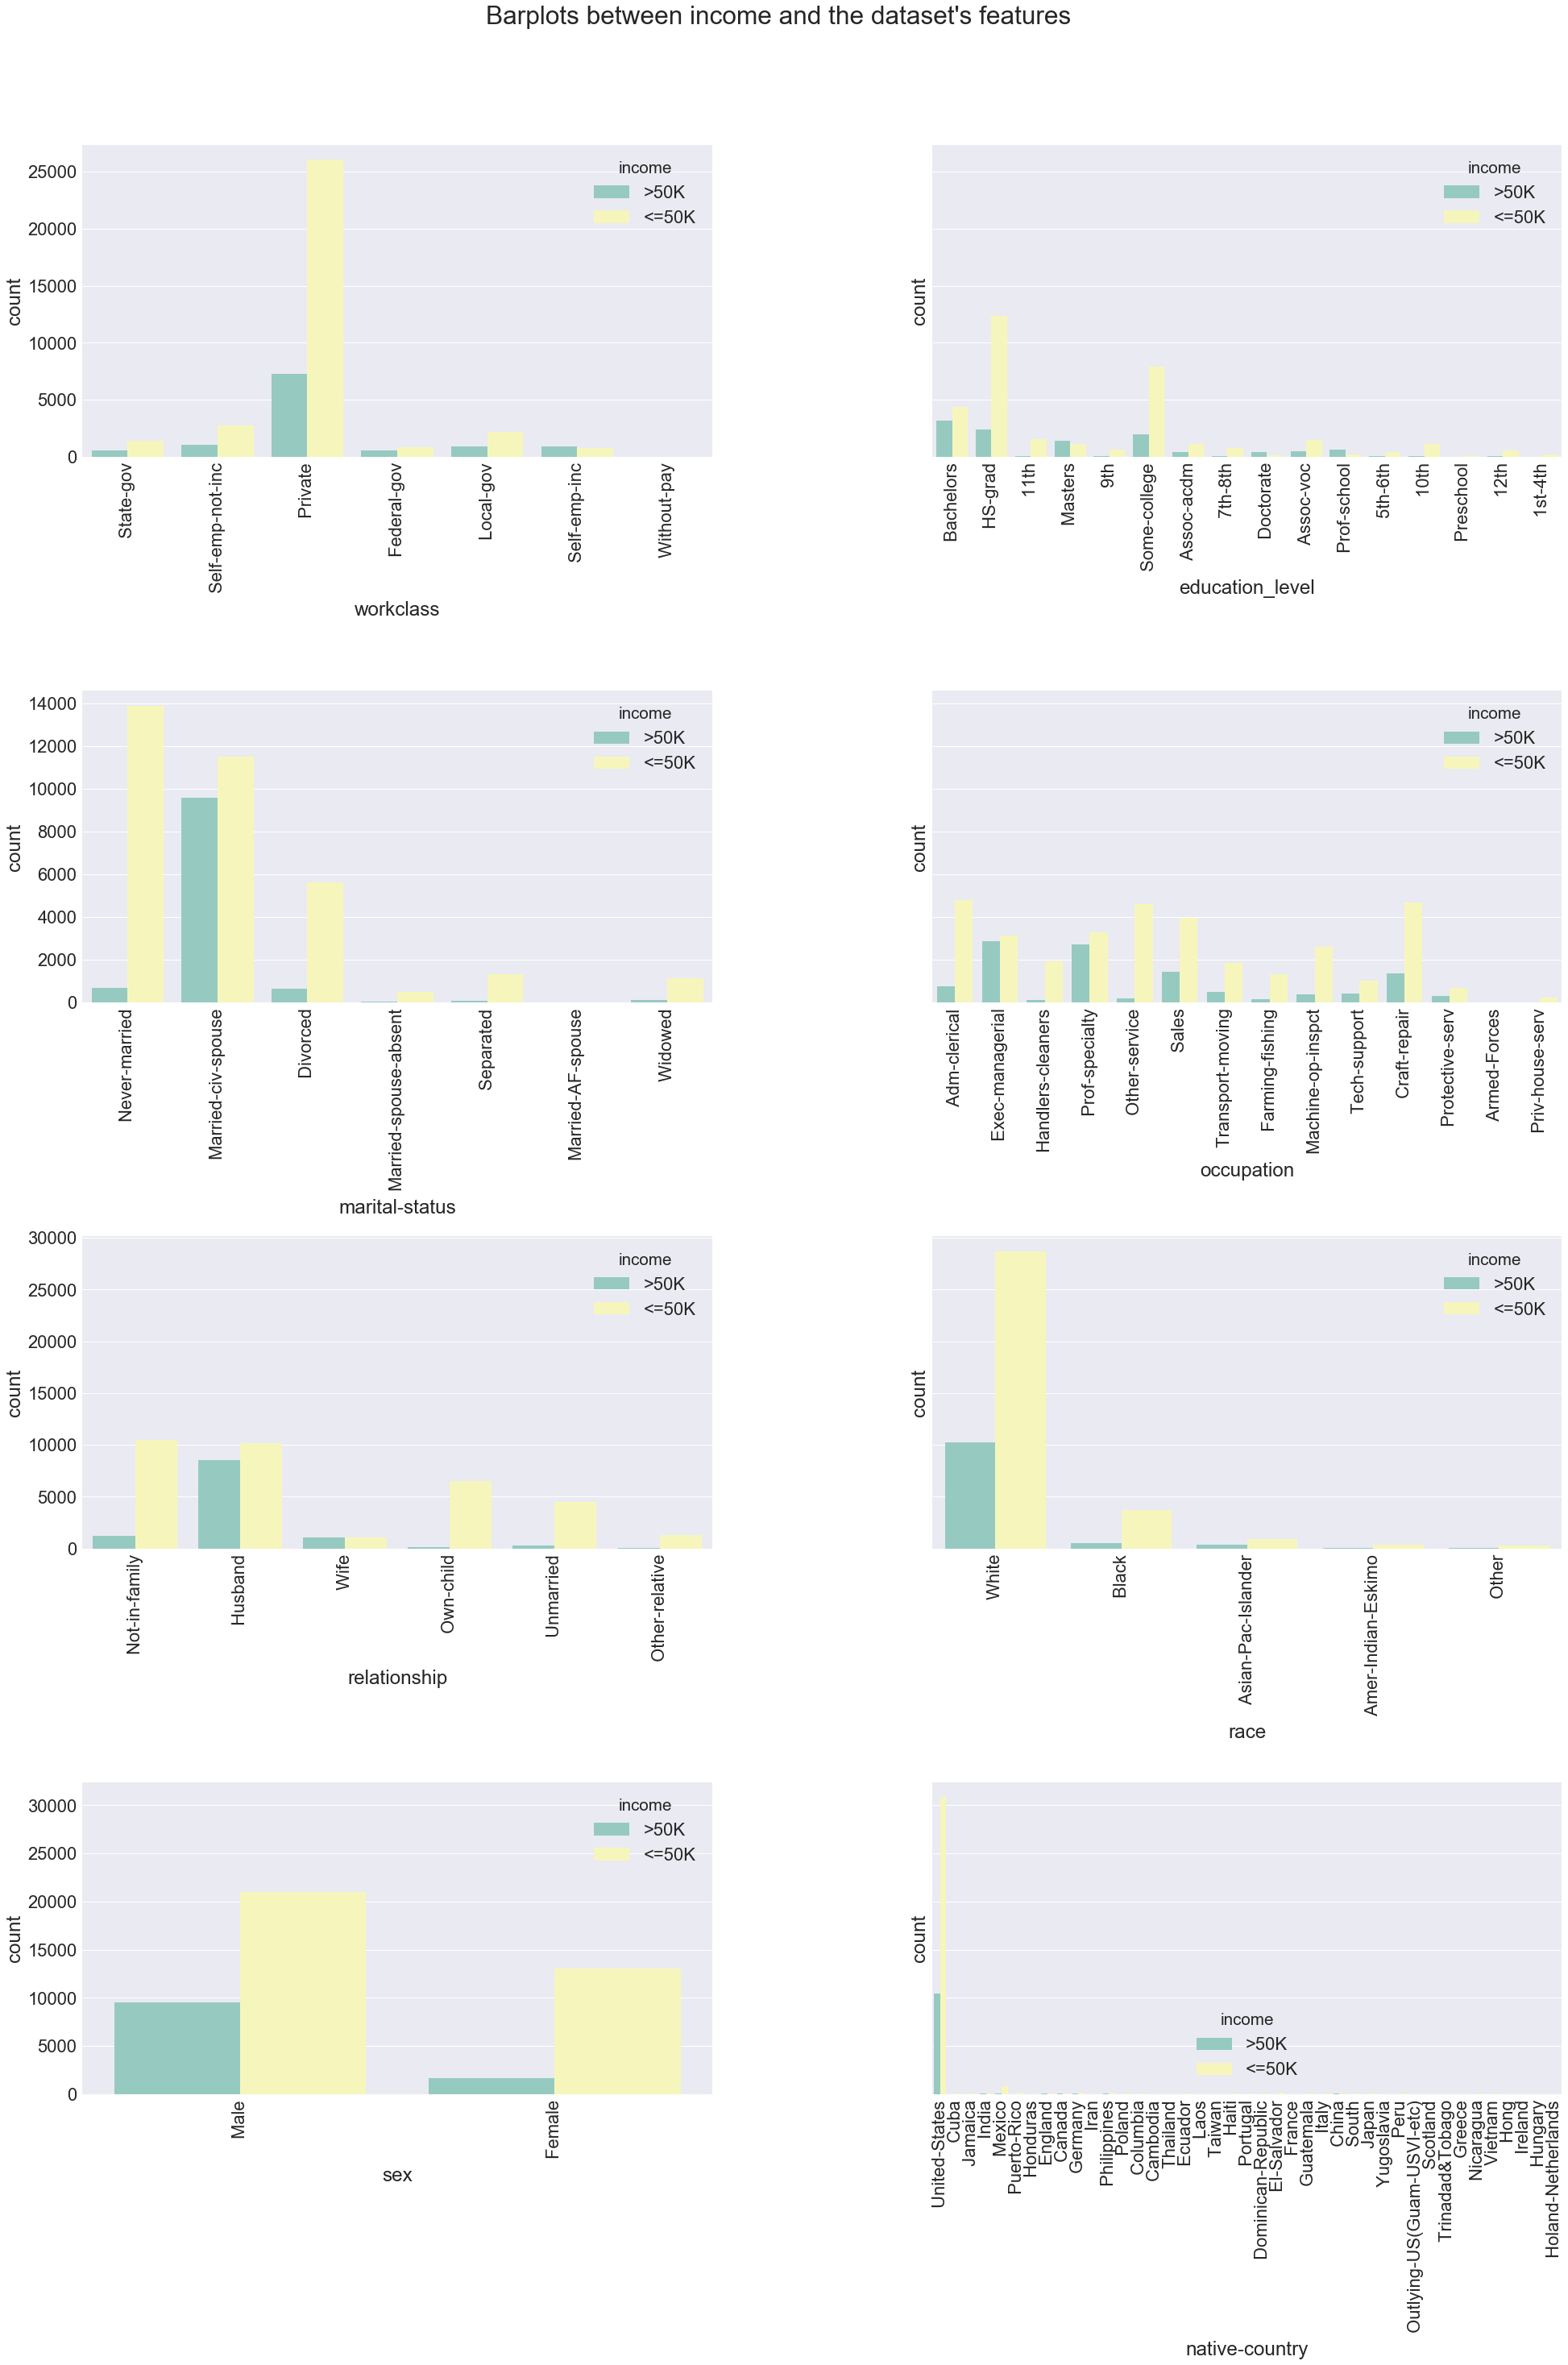

In [21]:
from matplotlib import gridspec

n_records = len(data)
sns.set(font_scale = 2.2) 
fig, ((axis1, axis2), (axis3, axis4), (axis5, axis6), (axis7, axis8)) = plt.subplots(4, 2, sharey='row',figsize=(30,40))

g = sns.countplot(x="workclass",hue="income", data=data,ax=axis1,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="education_level",hue="income", data=data,ax=axis2,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="marital-status",hue="income", data=data,ax=axis3,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="occupation",hue="income", data=data,ax=axis4,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="relationship",hue="income", data=data,ax=axis5,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sns.countplot(x="race",hue="income", data=data,ax=axis6,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="sex",hue="income", data=data,ax=axis7,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sns.countplot(x="native-country",hue="income", data=data,ax=axis8,palette="Set3",hue_order=[">50K","<=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75,
                    wspace=0.35)
plt.suptitle("Barplots between income and the dataset's features")

### Correlation between Features

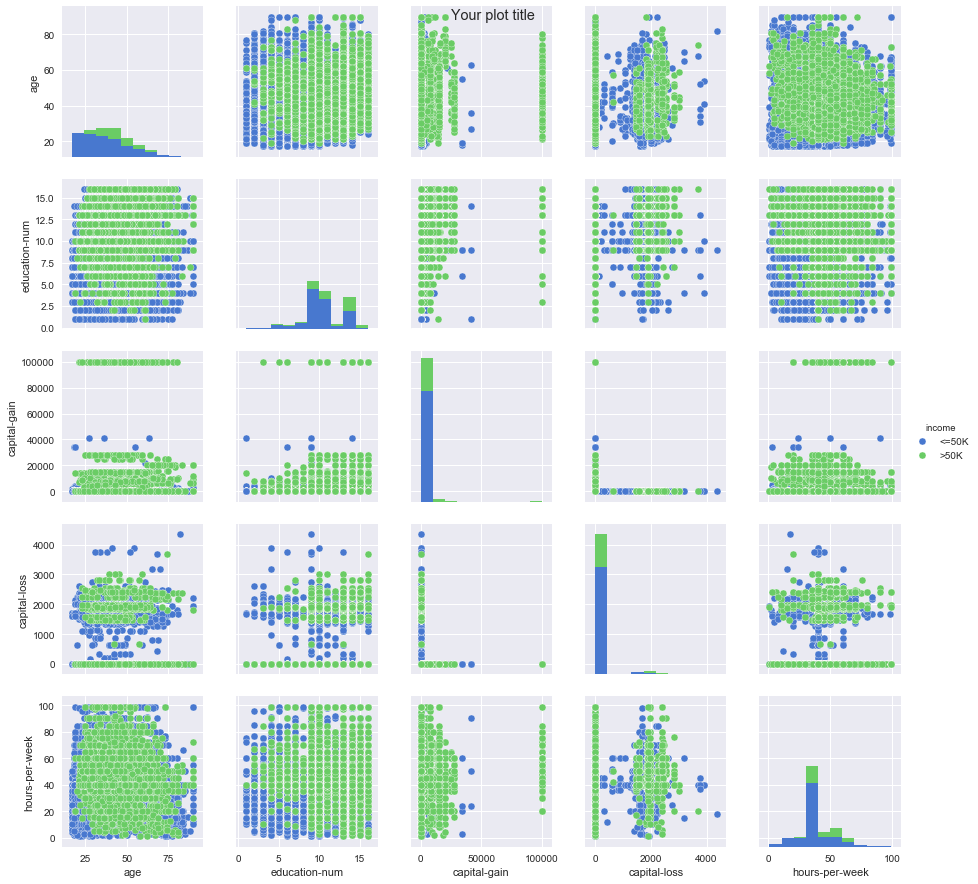

In [22]:
import seaborn as sns

sns.set(font_scale = 1) 
g = sns.pairplot(data, hue="income", dropna=True,palette="muted")
g.fig.suptitle("Your plot title")

### Pearson Correlation

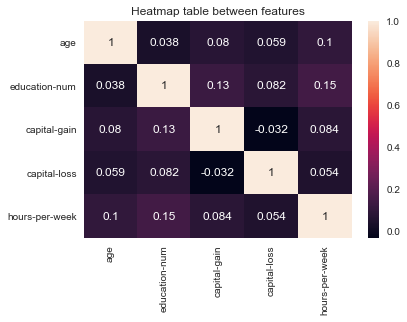

In [23]:
sns.set(font_scale = 1) 

ax = plt.axes()
sns.heatmap(data.corr(), annot=True, ax = ax)
ax.set_title('Heatmap table between features')

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

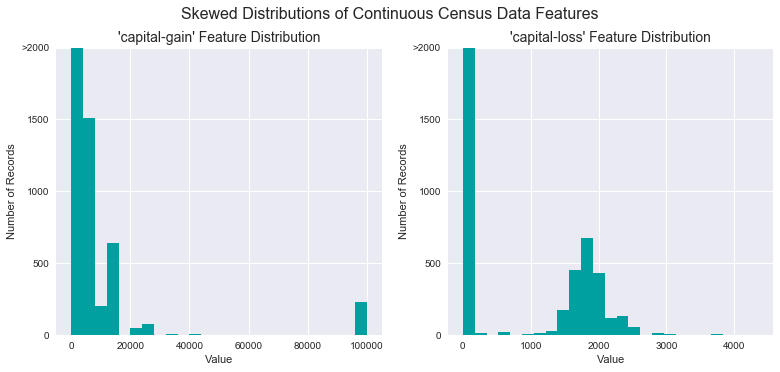

In [24]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

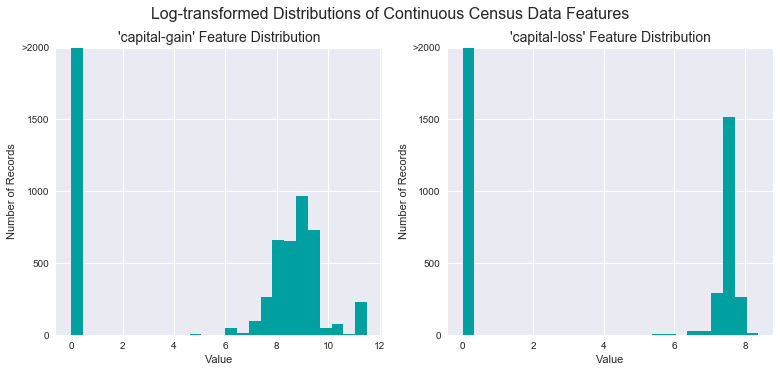

In [25]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [26]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [27]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [28]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [29]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+TN+FP+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
B = 0.5**2
fscore = (1+B)*((recall*precision)/((B*precision)+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

> *I really liked this part :), so I will describe 3 machine learning supervised models as requested for the Question 2 but the rest of the models should have a chance, so I expanded a bit more the answer of this question and after the analysis of the 3 required machine learning algorithms, I broadened my reply by adding some more extra models *:

1. Gaussian Naive Bayes
2. SVM
3. Gradient Boosting Trees
4. Random Forest *(extra)*
5. K-Nearest Neighbors *(extra)*
6. Logistic Regression *(extra)*

Machine Learning models are vast in numbers and sometimes an aspiring data scientist can easily get lost, hence a useful roadmap from scikit learn is provided to aid us for our machine learning journey:
![scikit-learn-ML-roadmap](https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/19273/1523538731/ml_map.png)


**Gaussian Naive Bayes**
- Applications: Gaussian Naive Bayes can be applied in many application such as Categorizing news, email spam detection, face recognition, sentiment analysis, medical diagnosis and digit recognition are just few of the popular use cases of Naive Bayes algorithm [(source)](https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used).
- Strengths: It is very easy to implement and to set up with few parameters [(source)](https://www.youtube.com/watch?v=nfbKTrufPOs).
- Weaknesses: Due to its name, "Naive", it does not conside the word order thus can conclude to false predictive results [(source)](https://www.youtube.com/watch?v=nfbKTrufPOs). Moreover, the naive bayes classifier is appropriate for big datasets in order to make reliable estimations of the probability of each class [(source)](https://www.researchgate.net/post/What_are_the_disadvantages_of_Naive_Bayes). While using Naive Bayes classification algorithm with a small data set, the precision and recall will keep very low [(source)](https://www.researchgate.net/post/What_are_the_disadvantages_of_Naive_Bayes). Furthermore, even when the underlying independence assumption is broken (i.e. when features have relationships between them), this algorithm still performs very well and is able to classify based on the maximum likelihood of a label given the set of features rather than on the actual probabilities of each feature. On the other hand, Naive Bayes' weakness is that if it encounters a previously unseen feature-label combination (on which it was never trained) it will incorrectly estimate likelyhood as 0 which can cause it to incorrectly classify the label. In addition When an attribute is continuous, computing the probabilities by the traditional method of frequency counts is not possible. In this case we would either need to convert the attribute to a discrete variable or use probability density functions to compute probability densities (not actual probabilities!). Most standard implementation automatically account for nominal and continuous attributes so the user does not need to worry about these transformations. However as a data scientist, it is important to be aware of the subtleties in the tool application [(source)](http://www.simafore.com/blog/3-challenges-with-naive-bayes-classifiers-and-how-to-overcome).
- Candidacy: This model could be a good candidate to create predictive models for this dataset, Naive Bayes is appropriate when we assume that the features are conditionally independent given the class. When the features are pairwise uncorrelated then the Naive Bayes will give great results otherwise, having correlated features leads Naive Bayes to modest results [(source)](https://www.quora.com/What-types-of-data-sets-are-appropriate-for-Naive-Bayes). Furthermore having decoded all feature with one hot encoding, Naive Bayes out of plain curiosity will be used and a model will be trained and evaluated to measure its performace.

**SVM**
- Applications: SVM is one of the most robust and accurate algorithm among the other classification algorithms. It also has a wide variaty of applications such as Face detection, Text and hypertext categorization, Classification of images, Bioinformatics, Protein fold and remote homology detection, Handwriting recognition, Generalized predictive control [(source)](https://data-flair.training/blogs/applications-of-svm/).
- Strengths: It works really well with clear margin of separation in the data. It is effective in high dimensional spaces. It is effective in cases where number of dimensions is greater than the number of samples. It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient[(source)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/). Moreover, SVMs can model datasets with nonlinear realationship with the appropriate kernel. SVMs generally provide precise predictions. SVMs determine the optimal hyperplane by the nearest points (support vectors) only and not by distant points. This thus enhances the robustness of the model in some cases [(source)](https://data-flair.training/blogs/svm-support-vector-machine-tutorial/). 
- Weaknesses: It doesn’t perform well, when we have large data set because the required training time is higher
It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library [(source)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/). SVMs are very sensitive to the choice of the kernel parameters. The difficulty in choosing the correct kernel parameters may compel to test many possible values. As a result, the computation time is sometimes lengthy [(source)](https://data-flair.training/blogs/svm-support-vector-machine-tutorial/).
- Candidacy: Due to its robustness and its versatility, SVM is an excellent candidate to model this dataset. Due to the fact that our data is a classification problem SVM will be a great choice. Because SVMs uses what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. That means that the boundary that the algorithm calculates doesn't have to be a straight line. The benefit is that you can capture much more complex relationships between your datapoints without having to perform difficult transformations on your own. The downside is that the training time is much longer as it's much more computationally intensive [(source_1)](https://www.researchgate.net/post/When_we_use_Support_Vector_machine_for_Classification), [(source_2)](https://community.alteryx.com/t5/Data-Science-Blog/Why-use-SVM/ba-p/138440).

**Gradient Boosting Trees**
- Applications: Gradient boosting trees is one of the most powerful techniques for building predictive models. The idea of boosting came out of the idea of whether a weak learner can be modified to become better [(source)](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/).
- Strengths: Its strength relies on the fact that it is based on the ensemble learning methods and predict by combining the outputs from individual trees. Generally have 3 parameters to train: shrinkage parameter, depth of tree, number of trees. Now each of these parameters should be tuned to get a good fit [(source)](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/).
- Weaknesses: training generally takes longer because of the fact that trees are built sequentially. However benchmark results have shown that are better learners than other machine learning algorithms [(source)](https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests).
- Candidacy: the data we have are given for the classification task and is the place where gradient boosting thrives. Because it lets you to go to the limits of whats possible with the given dataset. Also extensive experiments with hyperparameters are feasible. Hence is an appropriate machine learning algorithm in this case. However there are some drawbacks, Gradient Boosting Trees tend to overfit, but there are strategies to overcome same and build more generalized trees using a combination of parameters like learning rate (shrinkage) and depth of tree [(source)](https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests).

**Random Forest *(extra)* **

- Applications: Random Forest is a supervised classification algorithm and has a wide variety of real world applications, both in classification and regression. For example in banking, Random Forest algorithm is used to find loyal customers, which means customers who can take out plenty of loans and pay interest to the bank properly, and fraud customers, which means customers who have bad records like failure to pay back a loan on time or have dangerous actions. For the application in medicine, Random Forest algorithm can be used to both identify the correct combination of components in medicine, and to identify diseases by analyzing the patient’s medical records. For the application in the stock market, Random Forest algorithm can be used to identify a stock’s behavior and the expected loss or profit. For the application in e-commerce, Random Forest algorithm can be used for predicting whether the customer will like the recommend products, based on the experience of similar customers. [(source)](https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674)
- Strenthgs: Compared with other classification and regression techniques, Random Forest has many advantages, because in classification and regression problems can avoid overfitting
Furthermore for both classification and regression task, the same random forest algorithm can be used The Random Forest algorithm can be used for identifying the most important features from the training dataset. Random forests also have less variance than a single decision tree. It means that it works correctly for a large range of data items than single decision trees.
Random forests are extremely flexible and have very high accuracy. It also maintains accuracy even when a large proportion of the data are missing. [(source_1)](https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674), [(source_2)](https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm).
- Weaknesses: Although Random Forest are very fast to train, they are quite slow to create predictions once trained. More accurate ensembles require more trees, which means using the model becomes slower. In most practical situations this approach is fast enough, but there can certainly be situations where run-time performance is important and therefore other approaches would be preferred [(source)](https://www.quora.com/When-is-a-random-forest-a-poor-choice-relative-to-other-algorithms).
- Candidacy: Random forest gives good performance when there are categorical variables. As there are around 45000 entries in our dataset, random forest can train much better. Based on my research, The main disadvantage of Random forests is their complexity. They are much harder and time-consuming to construct than decision trees.
They also require more computational resources and are also less intuitive. When you have a large collection of decision trees it is hard to have an intuitive grasp of the relationship existing in the input data.
In addition, the prediction process using random forests is time-consuming than other algorithms [(source)](https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm). Based on the advantages mentioned above for the Random Forests combined with the fact that the dataset's target variable is a class/categorical variable (class - income), qualifies this machine learning approach for the following classification.


**K-Nearest Neighbors *(extra)* **

- Applications: K-Nearest Neighbors is an interesting machine learning algorithm which is characterized as a non parametric algorithm, that means it is a lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point. Several real world applications are the following; is often used in search applications where you are looking for “similar” items; that is, when your task is some form of “find items similar to this one”. You’d call this a kNN search. If you’re searching for semantically similar documents. The biggest use case of k-NN search might be Recommender Systems. If you know a user likes a particular item, then you can recommend similar items for them. To find similar items, you compare the set of users who like each item if a similar set of users like two different items, then the items themselves are probably similar! Credit ratings — collecting financial characteristics vs. comparing people with similar financial features to a database. By the very nature of a credit rating, people who have similar financial details would be given similar credit ratings. Therefore, they would like to be able to use this existing database to predict a new customer’s credit rating, without having to perform all the calculations.
Should the bank give a loan to an individual? Would an individual default on his or her loan? Is that person closer in characteristics to people who defaulted or did not default on their loans? In political science — classing a potential voter to a “will vote” or “will not vote”, or to “vote Democrat” or “vote Republican”. More advance examples could include handwriting detection (like OCR), image recognition and even video recognition [source_1](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7), [source_2](https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm).
- Strengths: Some pros about kNN are that it is insensitive to outliers — accuracy can be affected from noise or irrelevant features. KNN makes no assumptions about data  and that is useful, for example, for nonlinear data. Moreover it is a  simple algorithm — to explain and understand/interpret. It provides (relatively) high accuracy, also  it is pretty high but not competitive in comparison to better supervised learning models. Last but not least it is versatile /useful for classification or regression [(source)](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7).
- Weaknesses: The cons are that it is computationally expensive  because the algorithm stores all of the training data and requires a lot of memory. It stores all (or almost all) of the training data. When the number of neighbors are big then the prediction stage might be slow (with big K). Lastly it is sensitive to irrelevant features and the scale of the data [(source)](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)
- Candidacy: KNN is a practical and easy algorithm to understand and can be used for this dataset which goal is classification of the class "income".

**Logistic Regression *(extra)* **

- Applications: Logistic regression is used when the response we want to predict/measure is categorical with two or more levels. Some examples are gender of a person , outcome of a football match, etc., Image Segmentation and Categorization Geographic Image Processing Handwriting recognition Healthcare : Analyzing a group of over million people for myocardial infarction within a period of 10 years is an application area of logistic regression. Prediction whether a person is depressed or not based on bag of words from the corpus seems to be conveniently solvable using logistic regression Classifying sentiment of a review is one of the use cases that I am aware of for Logistic regresssion. Companies like Amazon use logistic regression to go through content of customer's review and do sentiment analysis based upon the texts in the review [(source)](https://www.quora.com/What-are-applications-of-linear-and-logistic-regression).
- Strengths: Logistic regression is simple and easy to understand. It's linear classifier works well in most of the situation. Moreover, Outputs have a nice probabilistic interpretation, and the algorithm can be regularized to avoid overfitting. Logistic models can be updated easily with new data using stochastic gradient descent [(source)](https://elitedatascience.com/machine-learning-algorithms).
- Weakness: Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. They are not flexible enough to naturally capture more complex relationships [(source)](https://elitedatascience.com/machine-learning-algorithms).
- Candicancy: I choose Logictic regression because is easy to apply and to understand compare to other more complex machine learning models. The dataset's response variable (income) has 2 levels which renders logistic regression appropriate for its classification task.


>***list of references/sources***
>
>
>- Naive Bayes:
    - [Naive Bayes Applications](https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used)
    - [Naive Bayes Stregths](https://www.youtube.com/watch?v=nfbKTrufPOs)
    - [Naive Bayes Weaknesses](https://www.youtube.com/watch?v=nfbKTrufPOs)
    - [Naive Bayes Weaknesses (2)](https://www.researchgate.net/post/What_are_the_disadvantages_of_Naive_Bayes)
    - [Naive Bayes Weaknesses (3)](http://www.simafore.com/blog/3-challenges-with-naive-bayes-classifiers-and-how-to-overcome)
    - [Naive Bayes - A good candidate for this dataset?](https://www.quora.com/What-types-of-data-sets-are-appropriate-for-Naive-Bayes)
>
>   
>- SVM:
    - [SVM Applications](https://data-flair.training/blogs/applications-of-svm/)
    - [SVM Strengths (1)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)
    - [SVM Stregths (2)](https://data-flair.training/blogs/svm-support-vector-machine-tutorial/)
    - [SVM Weaknesses (1)](https://data-flair.training/blogs/svm-support-vector-machine-tutorial/)
    - [SVM Weaknesses (2)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)
    - [SVM - A good candidate for this dataset? (1)](https://www.researchgate.net/post/When_we_use_Support_Vector_machine_for_Classification)
    - [SVM - A good candidate for this dataset? (2)](https://community.alteryx.com/t5/Data-Science-Blog/Why-use-SVM/ba-p/138440)
>
>
>- Gradient Boosting Trees:
    - [Gradient Boosting TreesApplications](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
    - [Gradient Boosting Trees Stregths](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
    - [Gradient Boosting Trees Weaknesses](https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests)
    - [Gradient Boosting Trees - A good candidate for this dataset?](https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests)
>
>
>- Random Forest:
    - [Random Forest Applications](https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674)
    - [Random Forest Stregths (1)](https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674)
    - [Random Forest Weaknesses](https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm)
    - [Random Forest - A good candidate for this dataset?](https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674)
>
>    
>- k-Nearest Neighbors:
    - [k-Nearest Neighbors Applications (1)](https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm)
    - [k-Nearest Neighbors Applications (2)](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)
    - [k-Nearest Neighbors Stregths](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)
    - [k-Nearest Neighbors Weaknesses](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)
>
>
>- Logistic Regression:
    - [Logistic Regression Applications](https://www.quora.com/What-are-applications-of-linear-and-logistic-regression)
    - [Logistic Regression Stregths](https://elitedatascience.com/machine-learning-algorithms)
    - [Logistic Regression Weaknesses](https://elitedatascience.com/machine-learning-algorithms)

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [30]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        

        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
            
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

#### *A small note*

I experimented with all the machine learning algorithms mentioned above not just with 3 models and in the end I gathered all evaluations (f-score and accuracy measure during test set predictions) in one dataframe

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.


C:\Users\praxitelis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


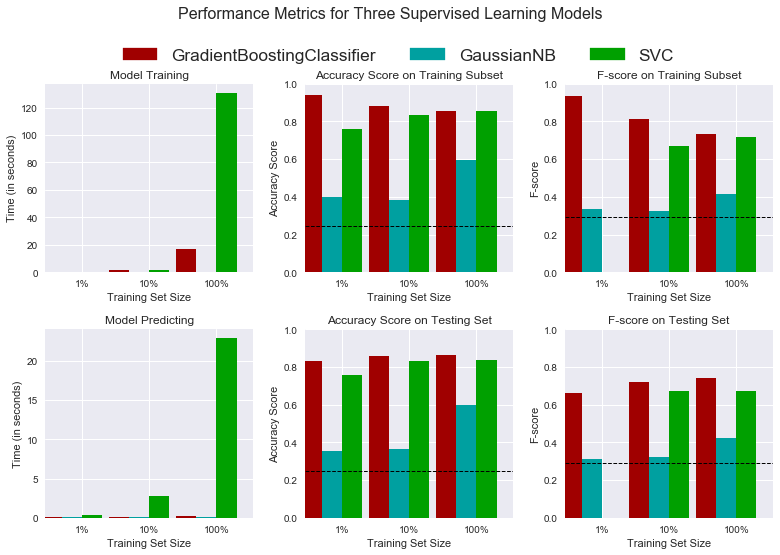

In [31]:
#TODO: Import the three supervised learning models from sklearn

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state=42)
clf_B = GaussianNB()
clf_C = SVC(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01 * len(X_train))
samples_10 = int(0.1 * len(X_train))
samples_100 = int(len(X_train))

# Collect results on the learners
results1 = {}
for clf in [clf_A, clf_B, clf_C, clf_C]:
    clf_name = clf.__class__.__name__
    results1[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results1[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results1, accuracy, fscore)

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.


C:\Users\praxitelis\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


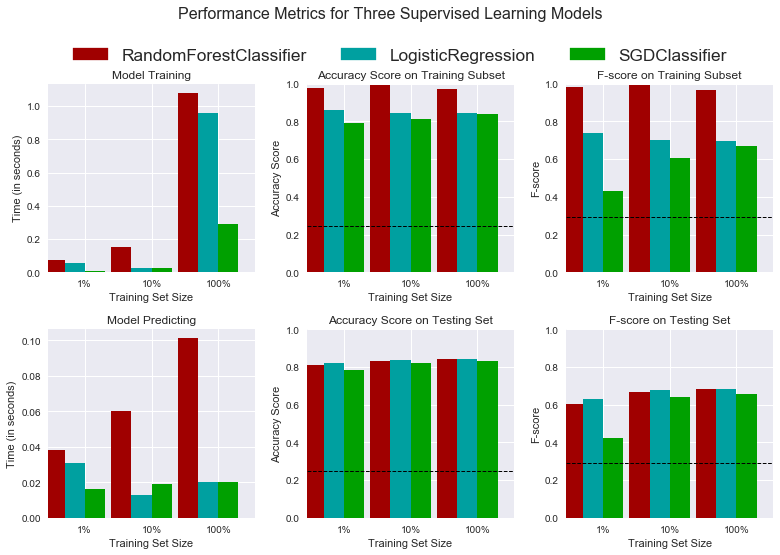

In [32]:
#TODO: Import the three supervised learning models from sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# TODO: Initialize the three models
clf_A = RandomForestClassifier(random_state=42)
clf_B = LogisticRegression(random_state=42)
clf_C = SGDClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01 * len(X_train))
samples_10 = int(0.1 * len(X_train))
samples_100 = int(len(X_train))

# Collect results on the learners
results2 = {}
for clf in [clf_A, clf_B, clf_C, clf_C]:
    clf_name = clf.__class__.__name__
    results2[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results2[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results2, accuracy, fscore)

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


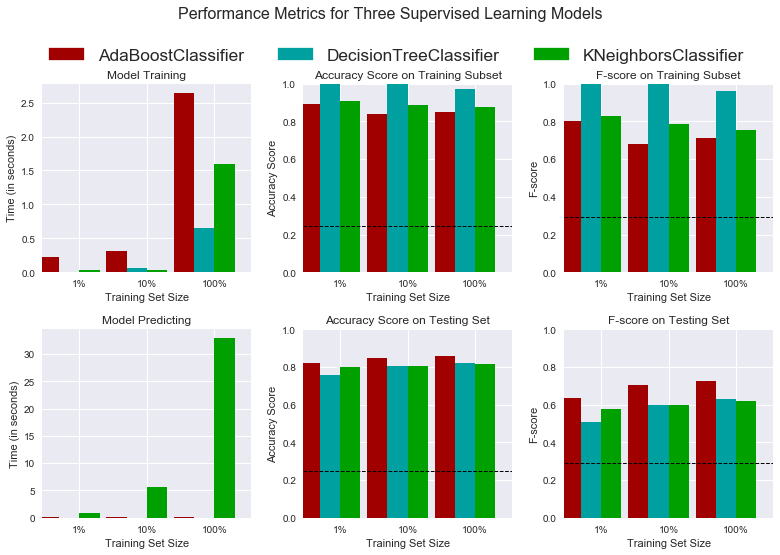

In [33]:
#TODO: Import the three supervised learning models from sklearn

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state=42)
clf_B = tree.DecisionTreeClassifier(random_state=42)
clf_C = KNeighborsClassifier(n_neighbors=3)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01 * len(X_train))
samples_10 = int(0.1 * len(X_train))
samples_100 = int(len(X_train))

# Collect results on the learners
results3 = {}
for clf in [clf_A, clf_B, clf_C, clf_C]:
    clf_name = clf.__class__.__name__
    results3[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results3[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results3, accuracy, fscore)

#### *Gathering all evaluations from all models in one dataframe*

In [34]:

# This function takes a nested dictionary and flattens it
def flatten_dict(d):
    def items():
        for key, value in d.items():
            if isinstance(value, dict):
                for subkey, subvalue in flatten_dict(value).items():
                    yield str(key) + "." + str(subkey), subvalue
            else:
                yield key, value

    return dict(items())

#Merge results from all 3 tests into single dictionary and then flatten the dictionary
final_results = results1.copy()
final_results.update(results2)
final_results.update(results3)
final_results = flatten_dict(final_results)

#Copy results into a dataframe for easier analysis of results
final_result_df = pd.DataFrame(columns=['model_name', 'iteration#'])
for key,value in final_results.items():
    key_split = key.split('.')
    final_result_df = final_result_df.append(pd.DataFrame([[key_split[0],key_split[1],value]],columns=['model_name', 'iteration#', key_split[2]] ))

final_result_df.set_index(['model_name'], inplace=True)
final_result_df.reset_index(inplace=True)

final_result_df = final_result_df.groupby(['model_name','iteration#']).mean()
final_result_df.reset_index(inplace=True)
print("List of all classifiers and their performance: \n")
final_result_df

List of all classifiers and their performance: 



,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
0,AdaBoostClassifier,0,0.820674,0.893333,0.632757,0.801282,0.146103,0.225161
1,AdaBoostClassifier,1,0.849862,0.840000,0.701882,0.680147,0.156110,0.317225
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.148105,2.644892
3,DecisionTreeClassifier,0,0.755224,1.000000,0.509523,1.000000,0.032021,0.003004
4,DecisionTreeClassifier,1,0.802764,0.996667,0.596479,0.997191,0.017014,0.063042
5,DecisionTreeClassifier,2,0.818905,0.970000,0.628635,0.963855,0.019015,0.649459
6,GaussianNB,0,0.351797,0.400000,0.310134,0.333333,0.093751,0.015625
7,GaussianNB,1,0.366059,0.383333,0.320258,0.325092,0.109494,0.031251
8,GaussianNB,2,0.597678,0.593333,0.420899,0.412500,0.091254,0.325204
9,GradientBoostingClassifier,0,0.831288,0.940000,0.659621,0.937500,0.034518,0.190848


### Sort by accuracy
Sort models by their accuracy on test set, Gradient Boosting Trees has the bst accuracy on test set (0.856%)

In [35]:
final_result_df[final_result_df['iteration#'] == '2'].sort_values(by=['acc_test'],ascending=False)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
11,GradientBoostingClassifier,2,0.863018,0.856667,0.739534,0.734127,0.229089,16.636548
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.148105,2.644892
20,RandomForestClassifier,2,0.843118,0.973333,0.684179,0.967262,0.101074,1.080765
17,LogisticRegression,2,0.841902,0.846667,0.683165,0.698529,0.020015,0.957679
26,SVC,2,0.837148,0.853333,0.674477,0.719697,22.884217,130.762594
23,SGDClassifier,2,0.834052,0.840000,0.658911,0.670732,0.020015,0.292206
5,DecisionTreeClassifier,2,0.818905,0.970000,0.628635,0.963855,0.019015,0.649459
14,KNeighborsClassifier,2,0.814815,0.876667,0.619956,0.753012,32.877898,1.602136
8,GaussianNB,2,0.597678,0.593333,0.420899,0.412500,0.091254,0.325204


### Sort by f-score
Sort models by their f-score on test set, gradient boosting trees again have the best f-score on test set (0.739)

In [36]:
final_result_df[final_result_df['iteration#'] == '2'].sort_values(by=['f_test'],ascending=False)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
11,GradientBoostingClassifier,2,0.863018,0.856667,0.739534,0.734127,0.229089,16.636548
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.148105,2.644892
20,RandomForestClassifier,2,0.843118,0.973333,0.684179,0.967262,0.101074,1.080765
17,LogisticRegression,2,0.841902,0.846667,0.683165,0.698529,0.020015,0.957679
26,SVC,2,0.837148,0.853333,0.674477,0.719697,22.884217,130.762594
23,SGDClassifier,2,0.834052,0.840000,0.658911,0.670732,0.020015,0.292206
5,DecisionTreeClassifier,2,0.818905,0.970000,0.628635,0.963855,0.019015,0.649459
14,KNeighborsClassifier,2,0.814815,0.876667,0.619956,0.753012,32.877898,1.602136
8,GaussianNB,2,0.597678,0.593333,0.420899,0.412500,0.091254,0.325204


### Sort by train-time
Lets find out which algorithm is the fastest during training phase. Gaussian Naive Bayes (due to its simplicity) is trained very fast (0.21 seconds)

In [37]:
final_result_df[final_result_df['iteration#'] == '2'].sort_values(by=['train_time'],ascending=True)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
23,SGDClassifier,2,0.834052,0.840000,0.658911,0.670732,0.020015,0.292206
8,GaussianNB,2,0.597678,0.593333,0.420899,0.412500,0.091254,0.325204
5,DecisionTreeClassifier,2,0.818905,0.970000,0.628635,0.963855,0.019015,0.649459
17,LogisticRegression,2,0.841902,0.846667,0.683165,0.698529,0.020015,0.957679
20,RandomForestClassifier,2,0.843118,0.973333,0.684179,0.967262,0.101074,1.080765
14,KNeighborsClassifier,2,0.814815,0.876667,0.619956,0.753012,32.877898,1.602136
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.148105,2.644892
11,GradientBoostingClassifier,2,0.863018,0.856667,0.739534,0.734127,0.229089,16.636548
26,SVC,2,0.837148,0.853333,0.674477,0.719697,22.884217,130.762594


### Sort by train-prediction-time
Lets find out which algorithm is the fastest during the test set's prediction phase. It seems that Logictic regression is the fastest (0.014 seconds)

In [38]:
final_result_df[final_result_df['iteration#'] == '2'].sort_values(by=['pred_time'],ascending=True)

,model_name,iteration#,acc_test,acc_train,f_test,f_train,pred_time,train_time
5,DecisionTreeClassifier,2,0.818905,0.970000,0.628635,0.963855,0.019015,0.649459
17,LogisticRegression,2,0.841902,0.846667,0.683165,0.698529,0.020015,0.957679
23,SGDClassifier,2,0.834052,0.840000,0.658911,0.670732,0.020015,0.292206
8,GaussianNB,2,0.597678,0.593333,0.420899,0.412500,0.091254,0.325204
20,RandomForestClassifier,2,0.843118,0.973333,0.684179,0.967262,0.101074,1.080765
2,AdaBoostClassifier,2,0.857601,0.850000,0.724551,0.711538,0.148105,2.644892
11,GradientBoostingClassifier,2,0.863018,0.856667,0.739534,0.734127,0.229089,16.636548
26,SVC,2,0.837148,0.853333,0.674477,0.719697,22.884217,130.762594
14,KNeighborsClassifier,2,0.814815,0.876667,0.619956,0.753012,32.877898,1.602136


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

Out of the all the models, the best model for this dataset is the Gradient Boosting Classifier. Its F-score and accuracy metrics applied to the test set are the best compare to the other classifiers. Although the Stochastic Gradient Descent Classifier has the smallest train time than the other classifiers, Gradient Boosting Classifier come 8th is training time. in general, Gradient Boosting Classifier allows to go to the limits of what's possible with the given dataset. Since there is not much correlation across our data, Gradient Boost Classifier has a good chance to find them with the given data. Also since the dataset is small, extensive experiments with hyperparameters are feasible. Given our situation, it makes complete sense to choose low bias and high variance Gradient Boost Classifier.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

It seems from all the machine learning algorithms/classifiers, Gradient Boosting tree classifier is more appropriate due to its performance than the others. Gradient Boosting Classifier works by combining several simple learners (here: decision trees), to create an ensemble of learners that can predict whether an individual earns above 50k or not. Each of the learners are created using “features” of individuals(eg. race, sex, education etc) create a set of rules that can predict a person’s income.

So lets describe how Gradient Boosting Trees work. The idea of Gradient boosting Trees stems from the the phrase: "*The power of many*", in particular can a set of weak learners create a single strong learner? Every word in the phrase "Gradient Boosting Trees" has a meaning that will be analyzed below. To dive into Gradient Boosting Trees consist of 3 basic elements:
1. Desicion Trees
2. Weak Learners than make predictions
3. An additive model to add weak learners to minimize the loss function.
4. A Loss function


1. So first things first, The term Decision Trees was mentioned. Decision tree is the first part of gradient boost trees, they are a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables. ![GitHub Logo](https://www.analyticsvidhya.com/wp-content/uploads/2016/04/dt.png)

2. Weak Learners, Decision Trees are characterized a weak learners. A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

3. The loss function used depends on the type of problem being solved. It must be differentiable, but many standard loss functions are supported and you can define your own.For example, regression may use a squared error and classification may use logarithmic loss. A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.

3. Additive Models, Trees are added one at a time, and existing trees in the model are not changed. A gradient descent procedure is used to minimize the loss when adding trees. Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error. Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss.

Lets combine a the ingredients together. During the training process, the algorithm looks at instances where it has predicted badly (weak learners), and prioritizes the correct prediction of those instances in the next round of training.  The boosting comes from rerunning this iteration over and over, placing a higher emphasis on the people whose incomes were miscalculated. In this way, the model is training itself through these multiple iterations to understand what data is hard to classify and what is not, giving itself little clues each time. Over time the model combines these little clues to understand the true nature of the data even when it may seem convoluted to the user or customer.
With each round, the model finds the best learner (or decision tree) to incorporate into the ensemble, repeating the process for the specified number of rounds, or till we can’t improve the predictions further. All the learners are then combined to make a final ensembled model, where they each vote to predict if a person earns more than 50k or not. Usually we take the majority of the votes to make a final prediction. Using this model with the census information of individuals, we can predict the same information for a potential new donor and predict if they earn more than 50K or not, and thus make a decision on the likeliness of them donating to charity.

A visualization of the ensemble of Desicion Trees which in turn leads to Gradient Boosting Trees is the following: ![Gradient Boosting Trees Model](https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/19273/1524688880/boosting_final.png)

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [39]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, fbeta_score

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state = 42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [100, 300, 500],
              'learning_rate': [0.1, 1, 1.3]
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\praxitelis\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8719
Final F-score on the testing data: 0.7547


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.8630            | 0.8719          |
| F-score        | 0.7395            | 0.7547          |


**Answer: **

The optimized model's scores are slightly better than the unoptimized model's scores. F-Score increased by 0.02 and Accuracy increased by 0.01 from the vanilla classifier parameters. However, both optimized and unoptimized scores are way better than naive predictor benchmark.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

The five features I belive most important for prediction in the order of importance are:

- age: the more aged you are the higher the salary is.

- education_level: those with a higher degree are more likely to get a better salary

- education-num: would provide some insight into how educated an individual is, higher the education, higher could be the income.

- capital-gain: measures how much profit an individual is making, should be greatly dependent on income.

- capital-loss: total loss suffered by an individual.

- occupation: income depends on the type of occupation and field where the individual is working.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

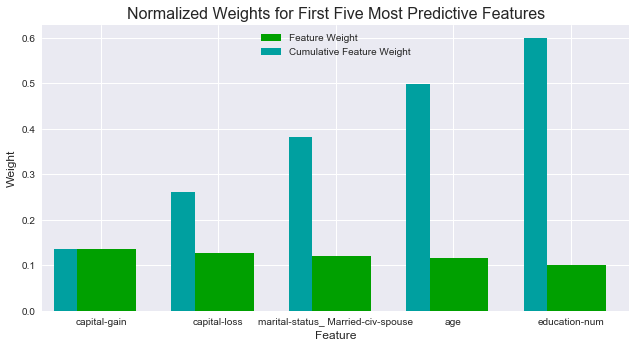

In [40]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_


# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

The five features presented by the visualization are really close to what I predicted. Though occupation doesn't seem to be causing much effect on income as I thought. Also, educationcal qualification doesn't seem to be higher than age in importance which is unexpected.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [41]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8719
F-score on testing data: 0.7547

Final Model trained on reduced data
------
Accuracy on testing data: 0.8589
F-score on testing data: 0.7257


### Feature selection and using PCA (out of curiosity)
What if the dataset were to double in size? Would you consider reducing the features space then?

Another idea, instead of solely picking a subset of features, would be to try out algorithms such as PCA. Which can be handy at times, as we can actually combine the most correlated/prevalent features into something more meaningful and still can reduce the size of the input. You will see this more in the next project!

Maybe something like this



In [42]:
from sklearn.decomposition import PCA
from sklearn.base import clone

pca = PCA(n_components=0.8, whiten=True)
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test)

clf_pca = (clone(best_clf)).fit(X_train_pca, y_train)
pca_predictions = clf_pca.predict(X_test_pca)

print ("\nFinal Model trained on PCA data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, pca_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, pca_predictions, beta = 0.5)))


Final Model trained on PCA data
------
Accuracy on testing data: 0.8331
F-score on testing data: 0.6633


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The F-score and accuracy reduced slightly with less features. If training time was a factor, I would not reduce the data, as it is not much but sufficient for training.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.